# Extracting Signatures from Document Images Using Contour Detection


In this notebook, we demonstrate how to extract signatures from scanned or photographed document images using contour detection techniques in computer vision. The process involves preprocessing the document image through thresholding and Gaussian blurring, detecting contours in the binary image, and filtering them based on area and height criteria to isolate potential signature regions. The extracted contours are then highlighted and masked to extract the corresponding regions, which can be saved or processed further. This approach is particularly effective for automating signature detection in applications such as document verification, archiving, and analysis.

# 1. Imports

In [41]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# 2. Define Utility Functions

In [59]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


def load_image(image_path: str) -> np.ndarray:
    """Loads an image in grayscale mode."""
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if image is None:
        raise FileNotFoundError(f"Error loading image from path: {image_path}")
    return image


def preprocess_image(image: np.ndarray, threshold: int = 150, blur_kernel: tuple = (5, 5)) -> np.ndarray:
    """Applies thresholding and Gaussian blur to an image."""
    _, binary_image = cv2.threshold(image, threshold, 255, cv2.THRESH_BINARY_INV)
    blurred_image = cv2.GaussianBlur(binary_image, blur_kernel, 0)
    return blurred_image


def detect_contours(image: np.ndarray) -> list:
    """Detects contours in a binary image."""
    contours, _ = cv2.findContours(image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    return contours


def filter_contours(contours: list, min_area: int = 500, min_height: int = 35) -> list:
    """Filters contours based on area and height criteria."""
    return [
        contour for contour in contours
        if cv2.boundingRect(contour)[3] > min_height
    ]


def draw_contours(image: np.ndarray, contours: list, color: tuple = (0, 255, 0), thickness: int = 2) -> np.ndarray:
    """Draws contours on an image."""
    output_image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(output_image, contours, -1, color, thickness)
    return output_image


def extract_signature_regions(image: np.ndarray, contours: list) -> np.ndarray:
    """Extracts signature regions from an image based on contours."""
    mask = np.zeros_like(image)
    for contour in contours:
        cv2.drawContours(mask, [contour], -1, 255, thickness=cv2.FILLED)
    signature_image = cv2.bitwise_and(image, mask)
    return signature_image


def display_results(original, preprocessed, contours_image, signatures_image, title):
    """Displays the processing steps and results for a single image."""
    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].imshow(original, cmap='gray')
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis('off')

    axs[0, 1].imshow(preprocessed, cmap='gray')
    axs[0, 1].set_title("Preprocessed Image")
    axs[0, 1].axis('off')

    axs[1, 0].imshow(contours_image)
    axs[1, 0].set_title("Image with Contours")
    axs[1, 0].axis('off')

    axs[1, 1].imshow(signatures_image, cmap='gray')
    axs[1, 1].set_title("Extracted Signature Regions")
    axs[1, 1].axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


def process_image(image_path: str, output_dir: str):
    """Processes a single image to detect and extract signature regions."""
    # Step 1: Load the image
    image = load_image(image_path)

    # Step 2: Preprocess the image
    preprocessed_image = preprocess_image(image)

    # Step 3: Detect contours
    contours = detect_contours(preprocessed_image)

    # Step 4: Filter contours
    signature_contours = filter_contours(contours)

    # Step 5: Draw the filtered contours
    output_image_with_contours = draw_contours(image, signature_contours)

    # Step 6: Extract signature regions
    extracted_signatures = extract_signature_regions(image, signature_contours)

    # Save results
    base_name = os.path.basename(image_path)
    cv2.imwrite(os.path.join(output_dir, f"contours_{base_name}"), output_image_with_contours)
    cv2.imwrite(os.path.join(output_dir, f"signatures_{base_name}"), extracted_signatures)

    # Display the results
    display_results(image, preprocessed_image, output_image_with_contours, extracted_signatures, title=base_name)


def process_directory(input_dir: str, output_dir: str):
    """
    Loops through all images in the input directory and applies the signature extraction pipeline.

    Args:
        input_dir (str): Path to the directory containing input images.
        output_dir (str): Path to the directory for saving output images.
    """
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    for filename in os.listdir(input_dir):
        file_path = os.path.join(input_dir, filename)
        if os.path.isfile(file_path) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp')):
            try:
                print(f"Processing: {filename}")
                process_image(file_path, output_dir)
            except Exception as e:
                print(f"Error processing {filename}: {e}")



Processing: 1.png


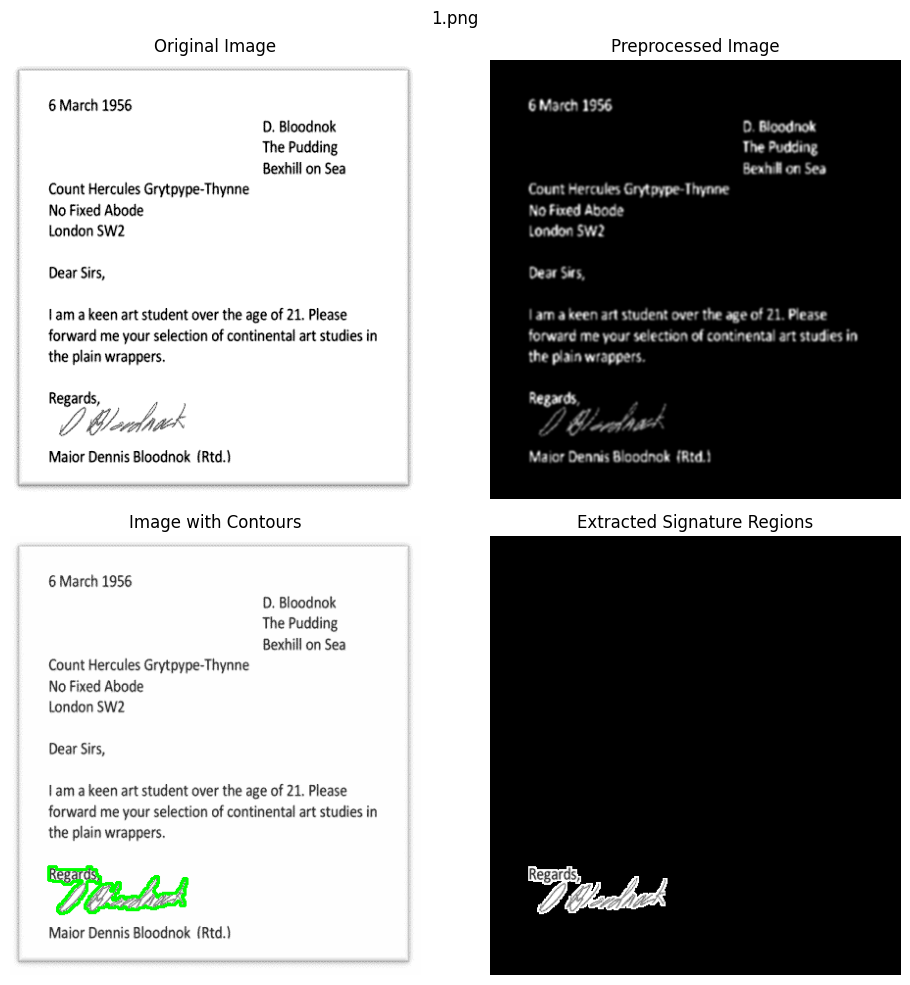

Processing: 10.jpg


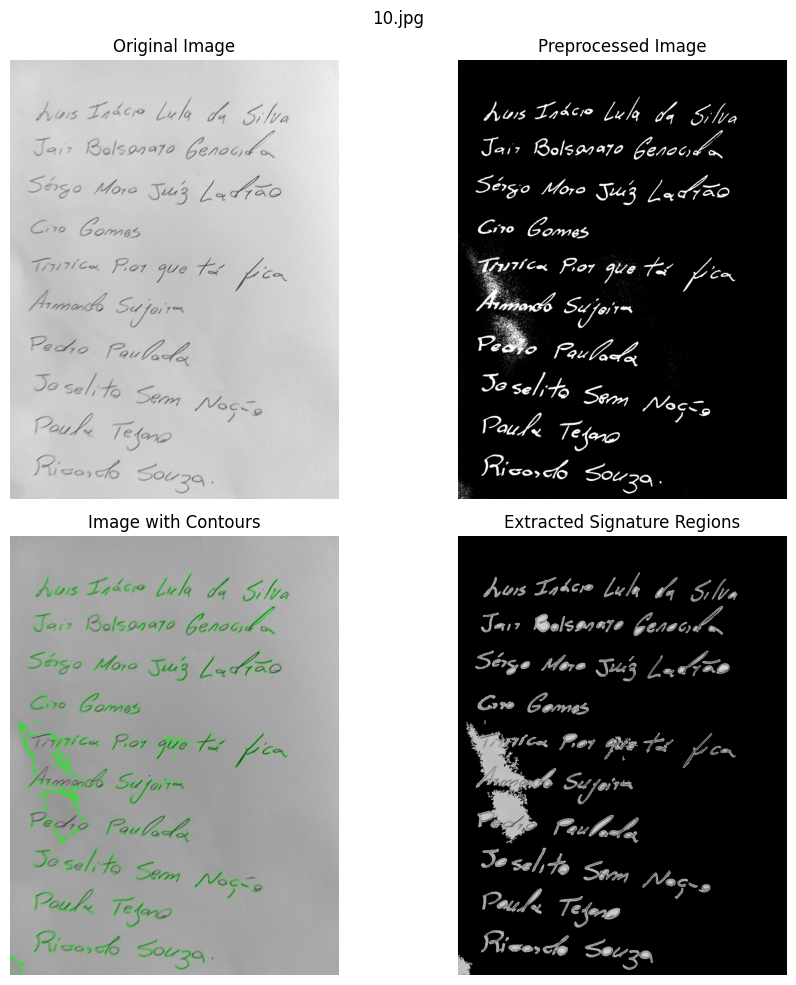

Processing: 11.png


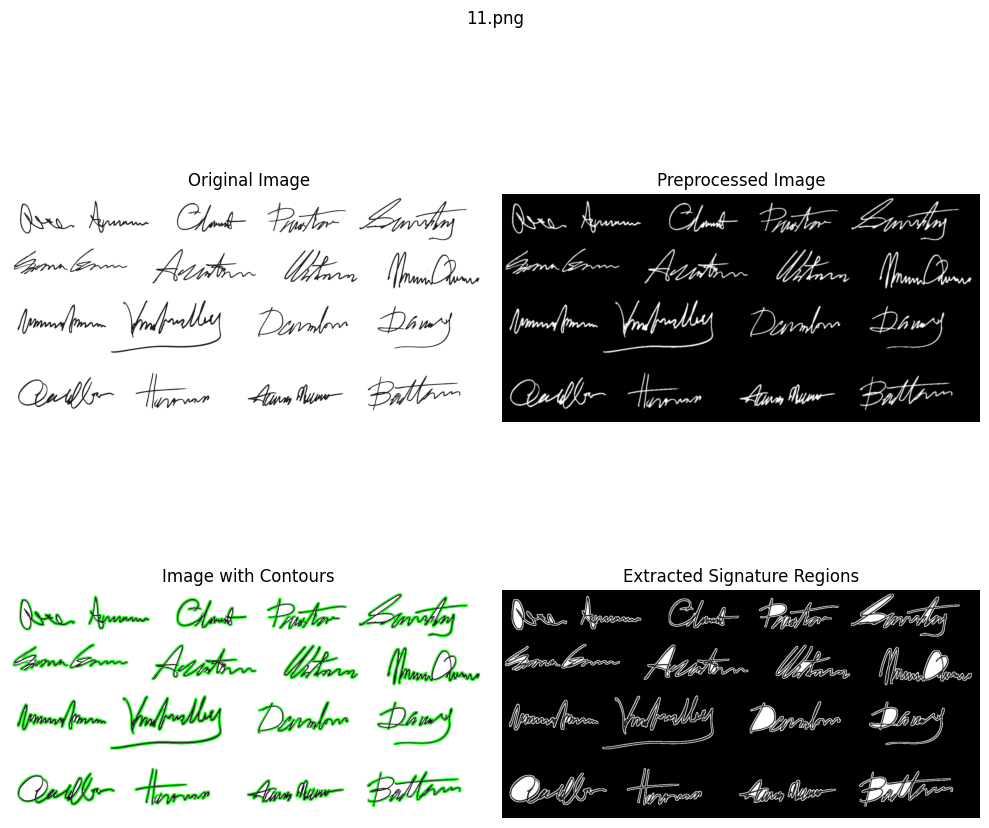

Processing: 2 (2).png


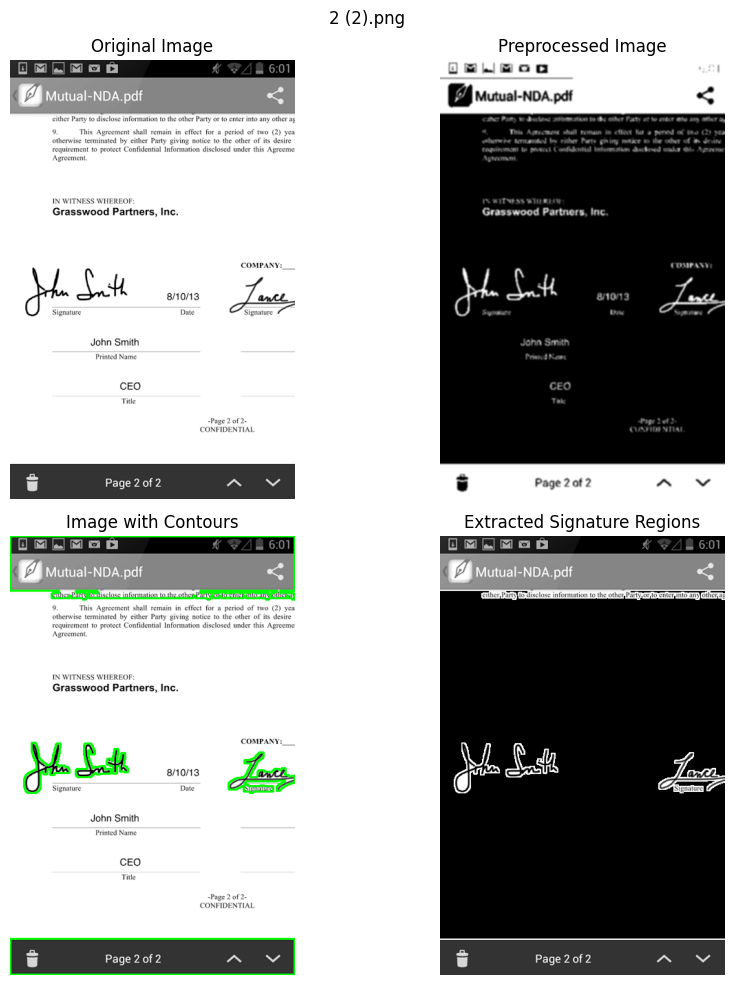

Processing: 2.png


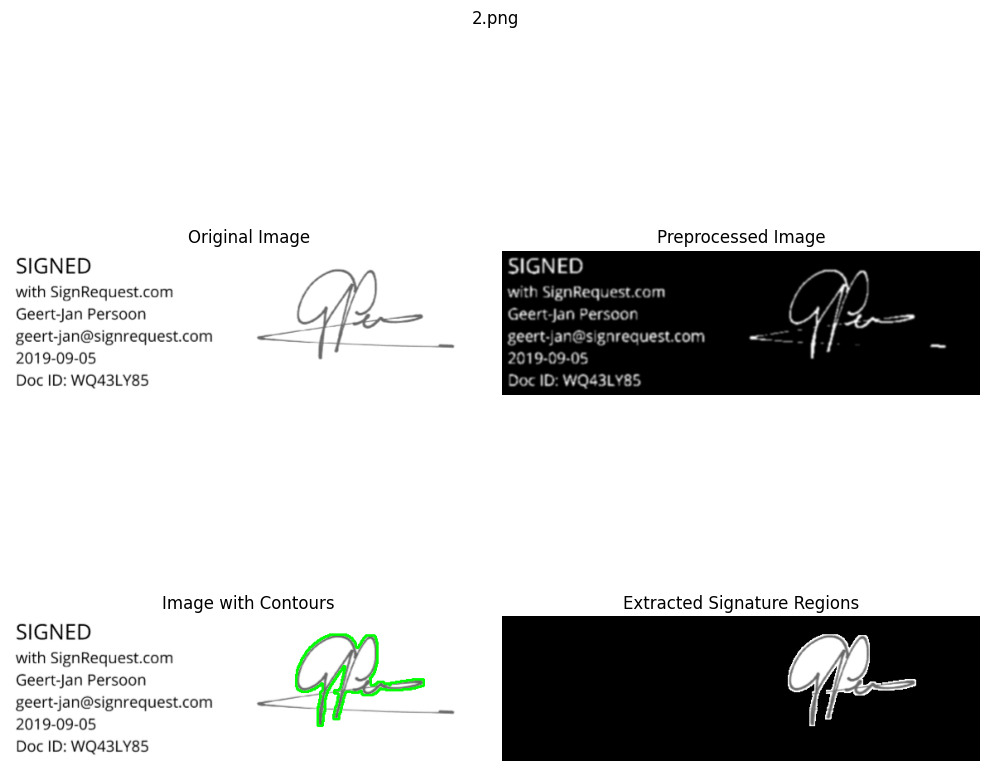

Processing: 3.jpg


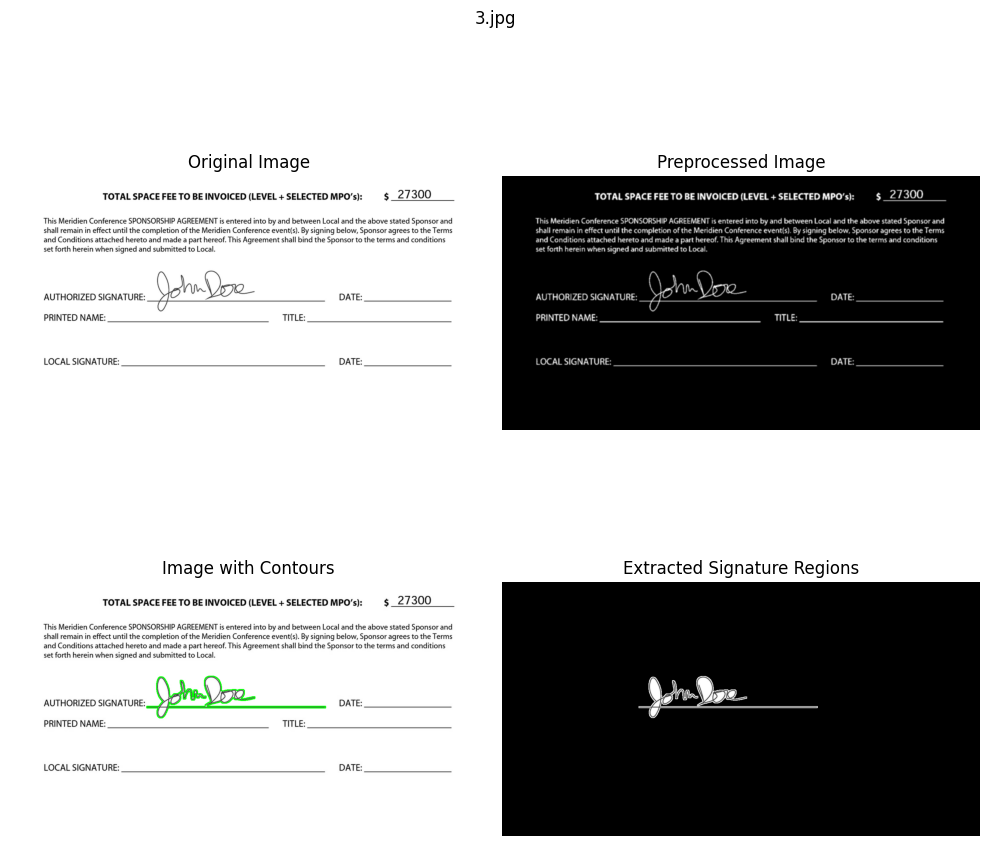

Processing: 3.png


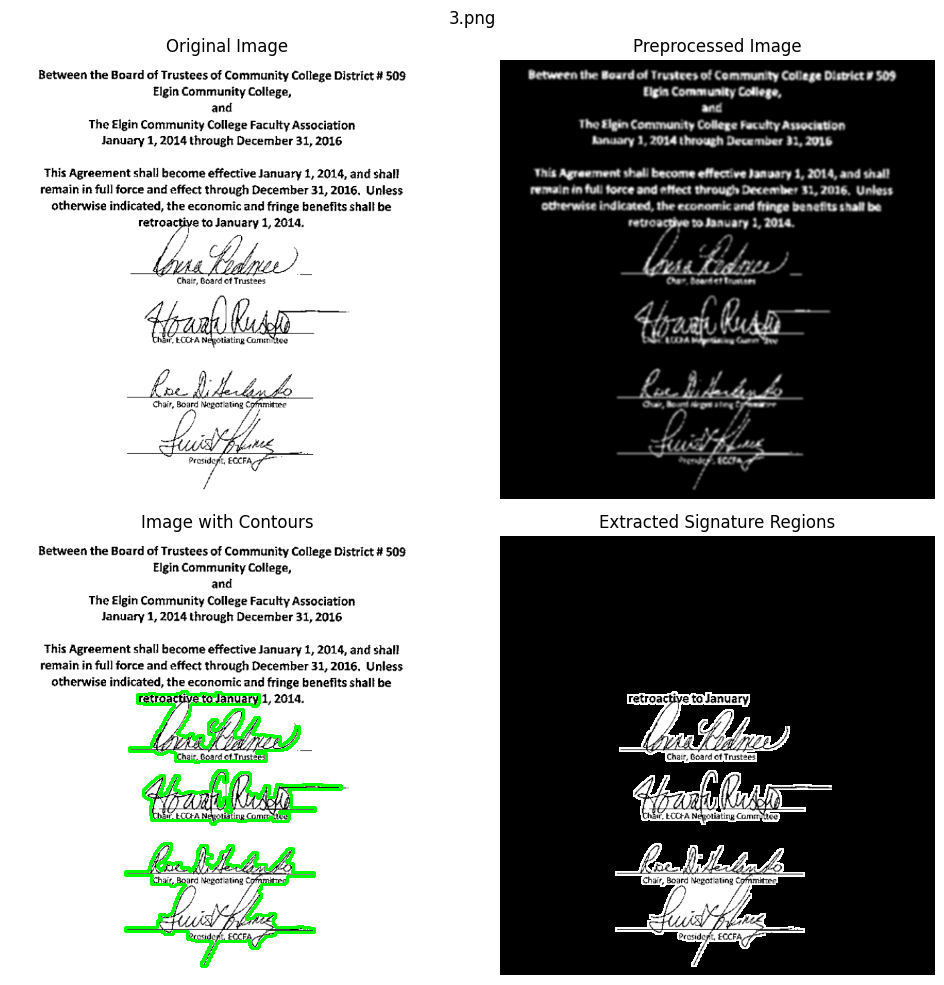

Processing: 6.png


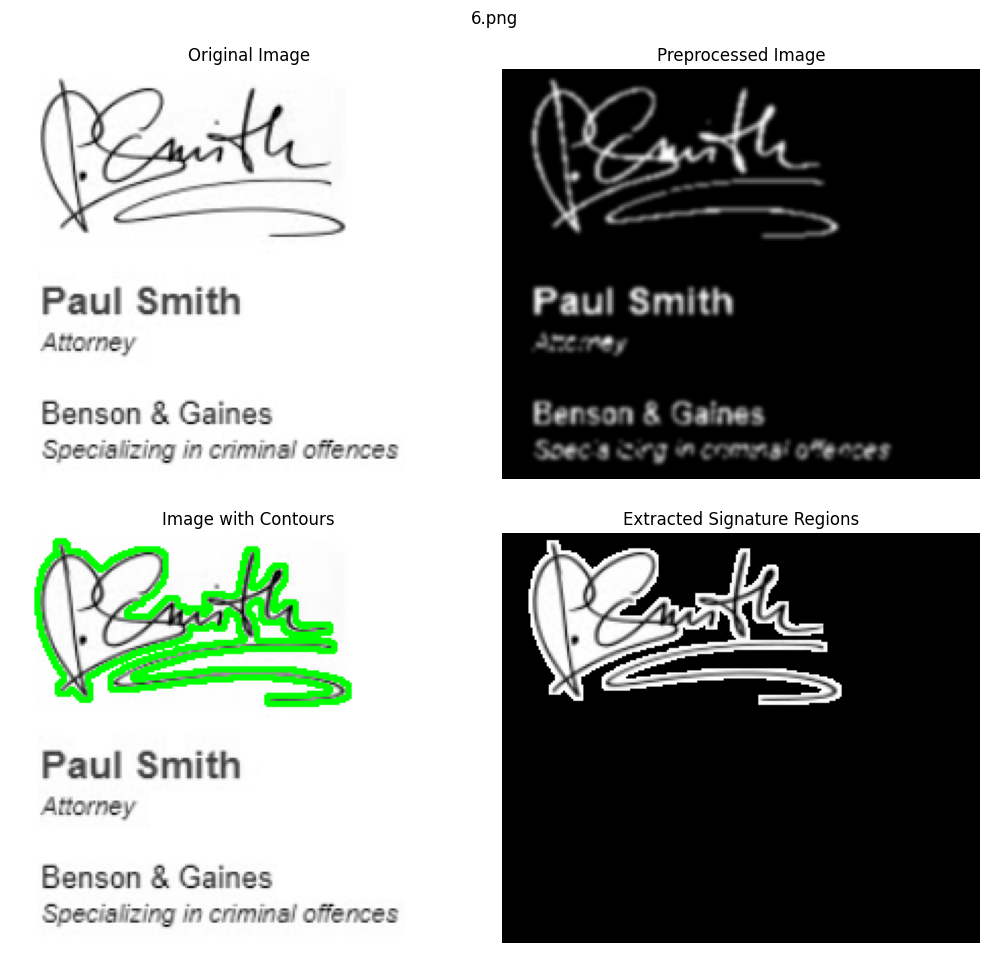

In [61]:
if __name__ == "__main__":
    input_directory = "Successful_Cases"
    output_directory = "Output"
    process_directory(input_directory, output_directory)